In [261]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import copy

In [262]:
data = pd.read_csv("actors.csv")
names = data['title'].tolist()
names = names[5000:6000]
print(len(names))

1000


In [263]:
G = nx.MultiDiGraph()
for n in names:
  s = n.split("_")
  # Add attributes to each node
  G.add_node(n, first_name=s[0], last_name=s[-1] )
print(len(G.nodes.data()))

1000


In [264]:
# Now find the edges between the nodes where the first name matches the last name
for node, attrs in G.nodes(data=True):
  # filter out our current node
  to_check = [el for el in G.nodes() if el not in node]
  # loop through the filtered list
  for poss in to_check:
    if attrs["first_name"] == G.nodes[poss]["last_name"]:
      G.add_edge(poss, node)
print(len(G.edges()))

133


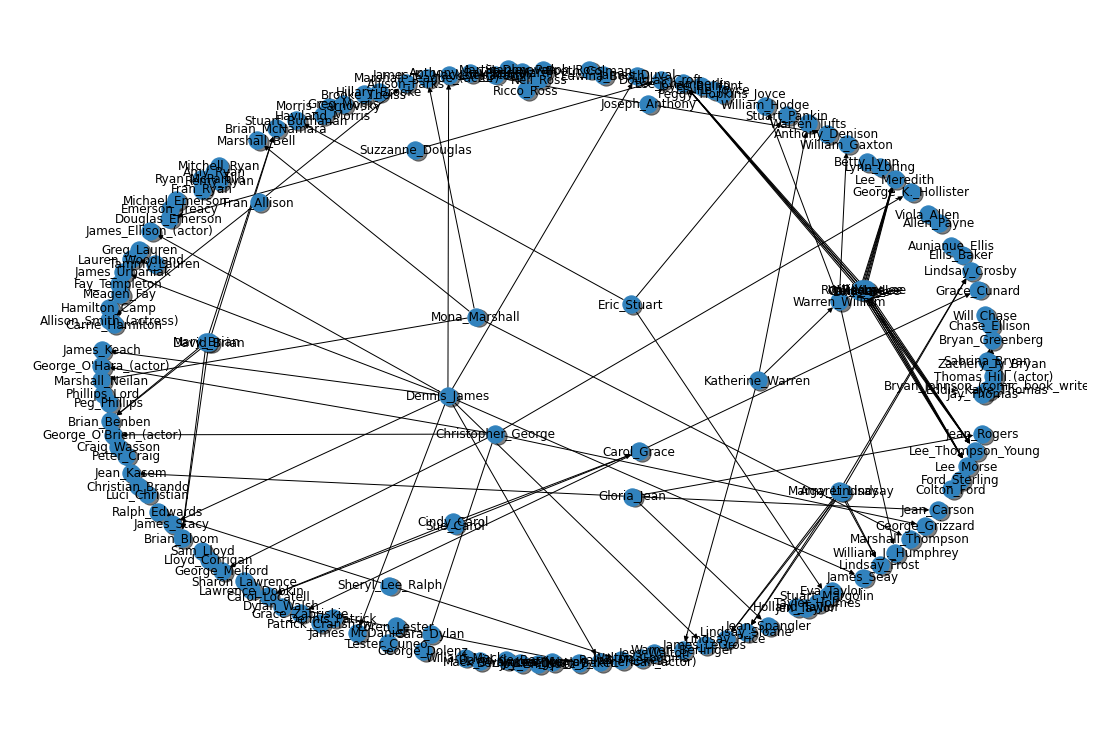

In [265]:
# remove isolated nodes
G.remove_nodes_from(list(nx.isolates(G)))

#pos = nx.layout.spiral_layout(G)
pos = nx.spring_layout(G, pos=pos, k=0.2, seed=132, iterations=50) 

# create position copies for shadows, and shift shadows
pos_shadow = copy.deepcopy(pos)
shift_amount = 0.006
for idx in pos_shadow:
  pos_shadow[idx][0] += shift_amount
  pos_shadow[idx][1] -= shift_amount


# draw the graph

fig = plt.figure(frameon=False)
ax = fig.add_axes([0,0,1,1])
ax.axis('off')

nx.draw_networkx_nodes(G, pos_shadow, node_color='k', alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color="#3182bd", linewidths=1)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, width=1)
plt.show()